# Exploratory Data Analysis

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## using yahoo finance scraper data

In [3]:
def get_historical_data(symbol):
    stock = yf.Ticker(symbol)
    data = stock.history(period="10y")
    return data


c:\Users\olive\anaconda3\envs\PortOptEnv\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\olive\anaconda3\envs\PortOptEnv\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


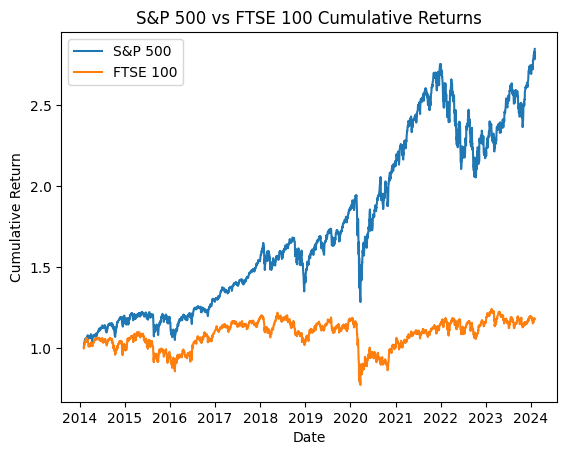

In [4]:
#s&p 500 performance over last 10 years vs ftse 100

sp500 = get_historical_data('^GSPC')
ftse = get_historical_data('^FTSE')

sp500['daily_return'] = sp500['Close'].pct_change() +1
ftse['daily_return'] = ftse['Close'].pct_change() +1

sp500['cumulative_return'] = np.cumprod(sp500['daily_return'])
ftse['cumulative_return'] = np.cumprod(ftse['daily_return'])

fig, ax = plt.subplots()
ax.plot(sp500['cumulative_return'], label='S&P 500')
ax.plot(ftse['cumulative_return'], label='FTSE 100')
ax.legend()
ax.set_title('S&P 500 vs FTSE 100 Cumulative Returns')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Return')
plt.show()

## Distribution of  Daily Returns

- Find distribution of daily returns for an asset. 
- Find the expected return of asset.
- Find the minimum vairance portfolio for a given rate of return and combination of assets

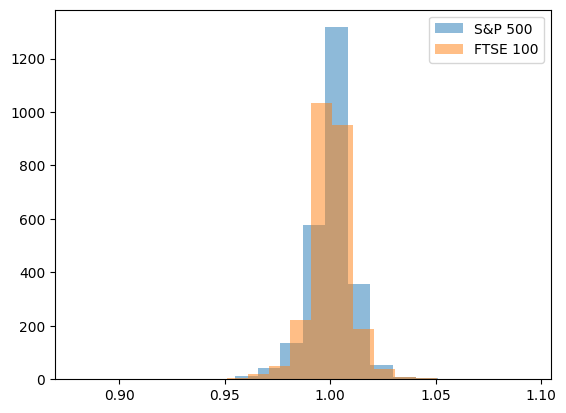

In [12]:
fig, ax = plt.subplots()
ax.hist(sp500['daily_return'], bins=20, alpha=0.5, label='S&P 500')
ax.hist(ftse['daily_return'], bins=20, alpha=0.5, label='FTSE 100')
ax.legend()

Could do the above process for all ftse100 or s&p500 to find stocks with high expected return and low variance.

In [13]:
sp500tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500tickers.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
